https://colab.research.google.com/drive/1kOYbW4kTuCr3dwpQ0Nc8NZb1l1PDtCz5

## import dataset and modules

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
sklearn.__version__

'1.1.1'

In [4]:
from joblib import Memory

memory = Memory('./tmp')
fetch_openml_cached = memory.cache(fetch_openml)
mnist = fetch_openml_cached('mnist_784')

mnist

________________________________________________________________________________
[Memory] Calling sklearn.datasets._openml.fetch_openml...
fetch_openml('mnist_784')
____________________________________________________fetch_openml - 94.7s, 1.6min


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [5]:
len(mnist['data'])

70000

## Preparation

In [6]:
X = mnist['data']          
y = mnist['target']

In [10]:
X.shape
# 28*28 pixels, 70000 images

(70000, 784)

In [9]:
y.shape

(70000,)

In [11]:
X[:5]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
type(y)

pandas.core.series.Series

In [30]:
X.iloc[66,:]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 66, Length: 784, dtype: float64

In [29]:
y.iloc[66]

'6'

## EDA

In [65]:
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

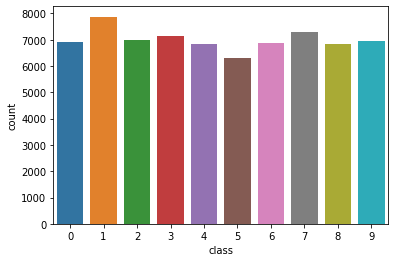

In [75]:
sns.countplot(x = y, hue = None)

In [67]:
X.isnull().values.any()

False

## Visualization of digits

def digit_viz(n):
    plt.imshow(X.iloc[n,:].values.reshape(28,28))

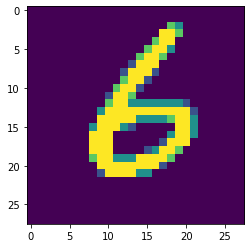

In [52]:
digit_viz(66)

In [54]:
# exercise: find all y that corresponds to 4

In [64]:
y.where(y==4)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
69995    NaN
69996    NaN
69997    NaN
69998    NaN
69999    NaN
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## Train test split

### method 1: sklearn to split by percentage
note that for time series data, do not shuffle. otherwise erase the time sensitive relationship

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

### method 2: numsplit to split by specified no. of observations

In [95]:
#num_split = 60000
#X_train, X_test , y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

In [96]:
# shuffle 
# this code doesnot work. it works for ndarray but x is dataframe
# i did not bother to fix the code
#shuffle_index = np.random.permutation(num_split)
#X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Transform target into binary variables
for demostration purpose. just to predict one digit

### Hardcode binary transformer
looks repetitive. suboptimal way. Dont bother

In [120]:
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

## Train Model

In [98]:
from sklearn.linear_model import SGDClassifier

model_sgdclassifier = SGDClassifier(random_state = 42)
model_sgdclassifier.fit(X_train, y_train)

SGDClassifier(random_state=42)

## Prediction

In [107]:
model_sgdclassifier.predict(X)

array(['5', '0', '3', ..., '9', '5', '6'], dtype='<U1')

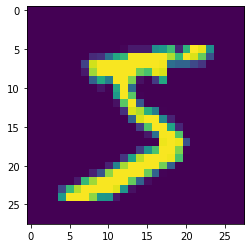

In [108]:
digit_viz(0)

## Evaluate model performance

### Stratified k fold cross validation
- code doesnt work because the data format changed. I dont want to use numpy as inputs either
- not a standard way. cause error easily
- just study the theory

In [116]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.base import clone

model_sgdclassifier_2 = SGDClassifier(random_state = 42)

In [117]:
skfolds = StratifiedGroupKFold(n_splits=3, shuffle = True,random_state = 42)

In [123]:
'''
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_model_sgdclassifier_2 = clone(model_sgdclassifier_2)
    X_train_fold = X_train[train_index]
    y_train_folds = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_model_sgdclassifier_2.fit(X_train_fold, y_train_folds)
    y_pred = clone_model_sgdclassifier_2.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct / len(y_pred)))
'''

'\nfor train_index, test_index in skfolds.split(X_train, y_train_0):\n    clone_model_sgdclassifier_2 = clone(model_sgdclassifier_2)\n    X_train_fold = X_train[train_index]\n    y_train_folds = (y_train_0[train_index])\n    X_test_fold = X_train[test_index]\n    y_test_fold = (y_train_0[test_index])\n    \n    clone_model_sgdclassifier_2.fit(X_train_fold, y_train_folds)\n    y_pred = clone_model_sgdclassifier_2.predict(X_test_fold)\n    n_correct = sum(y_pred == y_test_fold)\n    print("{0:.4f}".format(n_correct / len(y_pred)))\n'

### K-fold cross validation


In [125]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_sgdclassifier, X_train, y_train, cv=3, scoring='accuracy')

array([0.84212782, 0.87416296, 0.83129755])

#### trap for using cv accuracy as performace measure

skewed dataset

### Confusion matrix
note that the confusion matrix perform better in train data than test data


In [128]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [148]:
predicted_y_train = cross_val_predict(model_sgdclassifier, X_train, y_train, cv=3)

In [149]:
result_confusion_matrix = confusion_matrix(y_train, predicted_y_train)

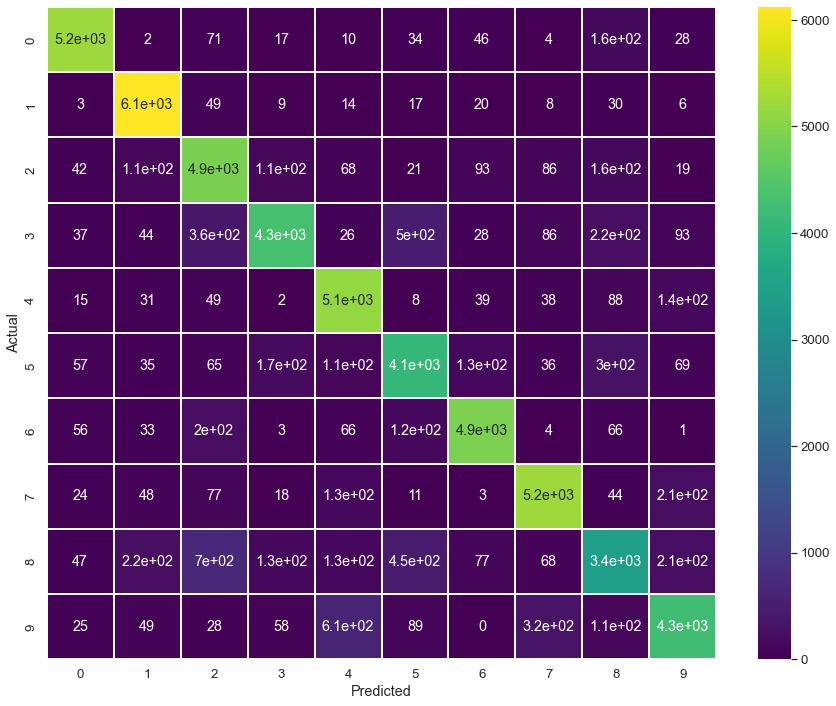

In [150]:
plt.figure(1, figsize = (15,12))
sns.set(font_scale=1.2)
color = plt.get_cmap('viridis').copy()   # default color
color.set_bad('lightblue') 
ax = sns.heatmap(result_confusion_matrix , annot=True, linewidth=0.4, cmap=color)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
# plt.savefig('heatmap')
plt.show()

#### confusion matrix for binary classfier

In [151]:
# let prediction be a binary result: True, False


'''

# version 1
pd.DataFrame(result_confusion_matrix _matrix(y_train, predicted_y_train)

# version 2 with nested column and row labels
pd.DataFrame(result_confusion_matrix (y_train_0, y_train_pred),
             columns=pd.MultiIndex.from_product([['Prediction'], ["Negative", "Positive"]]),
             index=pd.MultiIndex.from_product([["Actual"], ["Negative", "Positive"]]))
'''

'\n\n# version 1\npd.DataFrame(result_confusion_matrix _matrix(y_train, predicted_y_train)\n\n# version 2 with nested column and row labels\npd.DataFrame(result_confusion_matrix (y_train_0, y_train_pred),\n             columns=pd.MultiIndex.from_product([[\'Prediction\'], ["Negative", "Positive"]]),\n             index=pd.MultiIndex.from_product([["Actual"], ["Negative", "Positive"]]))\n'

### Precision

- accuracy of positive prediction

- https://www.v7labs.com/blog/precision-vs-recall-guide

- write a custom function to extract TP, TP, FP to return precision

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$


### Recall
- aka sensitivity
- more frequently used
- ratio of positive instantiates that was successfully returned from the model

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$

### F1 score

$F_1$ score is the harmonic mean of precision and recall. Regular mean gives equal weight to all values. Harmonic mean gives more weight to low values.


$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$

The $F_1$ score favours classifiers that performs well for model which have both good precision and recall score. It would not perform well if any of precision or recall performs badly.


In [158]:
from sklearn.metrics import f1_score
f1_score( y_train, predicted_y_train, average = 'micro')
# for multiclass classification
# for binary classfication. by default, average = "binary"

0.8491964285714285

### Precision-recall tradeoff

- read the original course code for concept illustration and code explanation
- by default: SVM ( loss = "hinge")